# Bagged Trees Regresyon

* Bu Bolumde Topluluk Ogrenme Yontemlerinin Girisinde Oluyoruz ( 2 Turu Var )

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings # Hatalari Kapatmak Icin Kullanilir
filterwarnings('ignore') # Hatalari Kapatmak Icin Kullanilir

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [4]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [5]:
bag_model = BaggingRegressor(bootstrap_features = True) # bootstrap_features = True ---->> Normalde Bu Deger False Fakat Biz True Yaptik Cunku Bootstrap Orneklemlerini Gozlemlicez
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [6]:
# ?bag_model # ----->> n_estimators ---->> ( Parametresi ) Birbirinden Farkli Agaclari Ifade Eder ( Varsayilan : 10 --->> 10 Tane Agac Olusturulacak Demektir )

In [7]:
bag_model.n_estimators

10

In [8]:
bag_model.estimators_ # Ciktidaki Degerler ---->> Birbirinden Fakli Agaclari Gosteriyor

[DecisionTreeRegressor(random_state=1057616344),
 DecisionTreeRegressor(random_state=1899494400),
 DecisionTreeRegressor(random_state=1920381938),
 DecisionTreeRegressor(random_state=429430397),
 DecisionTreeRegressor(random_state=1018145283),
 DecisionTreeRegressor(random_state=186832898),
 DecisionTreeRegressor(random_state=1991136494),
 DecisionTreeRegressor(random_state=1494332599),
 DecisionTreeRegressor(random_state=136223022),
 DecisionTreeRegressor(random_state=1532295025)]

In [9]:
# Her Bir Agacta Kac Tane Ornek Oldugunu Gozlemlemek Istersek

bag_model.estimators_samples_ # ( Her Bir Agactaki Ornekleri Gosteriyor ) ( Birbirinden Fakli Indexlerde Olumus Olucak Tabiki )

[array([166,  12, 137,  59,  99,  73, 176,  25, 172,   1,  82, 120, 175,
          7,  95, 157,  43,  22, 164,  32,  85, 126,  17,  79,  29, 120,
         12,  25,  22,  52, 100, 181, 101,  70,  86, 144,  71,  30, 119,
        106,  71,  15, 101, 118,  33, 144, 147,  76, 180,  83,  48,  56,
         19, 183,  91,  35, 162,  74,  46,  48,  21, 183,  51,  82,  42,
         45,  71,  86,   9, 147,  72,  93,  36, 144,   4,  68, 133,  29,
         37,  75,  65,  61,  62,  48,  61, 135, 172, 165, 164, 131, 105,
        109, 107,  45,  60,  98,  92,  48, 168,  11,  33, 162, 193, 185,
        129, 177,  32,  80,  47, 116, 143,  41,  96,  53, 125,  86,  48,
        168, 190, 150,  15, 170,  79, 131, 103, 179, 187, 149, 150, 106,
        152, 193,  43,  90,  52, 157,  53,  60, 186,  25, 186, 113, 129,
          2, 158,   4, 127, 143, 123,  56,   7, 127, 107,  47,  45,  67,
        161,  50, 193, 117, 195, 128, 111, 143, 104,  79, 150, 102, 180,
        118, 121,  32, 133,  92,  52,  70, 170, 108

In [10]:
# Her Bir Agacin Bagimsiz Degiskenlerine Ulasmak Istersek

bag_model.estimators_features_ # Buturn Agaclarin Kullandigi Degiskenlerine Ve Indexlerine Erismis Olduk

[array([10, 17,  6, 13, 11, 10,  9,  6,  0, 18,  0, 13, 17,  8, 12, 13, 17,
         8,  4]),
 array([ 0, 16, 15,  2, 10, 16,  0, 12, 14, 16,  1,  0, 10, 16,  4, 12, 12,
        11,  9]),
 array([18,  3,  3, 17,  9, 16,  2, 10, 18, 12, 16, 17, 18, 18, 18, 17, 16,
         7, 17]),
 array([15, 10, 10,  1, 12, 13, 14, 18, 18,  6, 18, 17,  2,  9, 17, 11,  9,
        15, 10]),
 array([ 3, 14,  9, 13, 12, 14,  8, 14, 10, 13, 18, 18, 16,  2,  4, 14,  4,
        10, 11]),
 array([ 2, 12,  1,  9, 11, 17, 17,  0,  1, 10, 12,  2, 12, 16,  7,  2, 14,
         1,  7]),
 array([14,  0, 18,  7, 11, 15, 18, 10, 18, 15, 15,  9, 14, 18, 11, 10, 10,
         3, 11]),
 array([ 1,  4,  8,  2, 14, 13,  7,  4,  6,  2, 16,  4,  5, 18, 14, 18,  3,
         4,  3]),
 array([14,  5,  9,  4,  0,  2,  5,  2,  9, 12, 12, 14, 10,  8,  5,  7,  0,
         7,  7]),
 array([17,  2, 16, 11, 16, 13,  3,  9,  9, 14,  1,  5,  6, 16,  7, 10,  7,
        14, 13])]

In [11]:
# Her Bir Modele Ozel Degerlere Erismeye Calisalim

bag_model.estimators_[0]

DecisionTreeRegressor(random_state=1057616344)

In [12]:
bag_model.estimators_[1] # random_state Degerleri Farkli

DecisionTreeRegressor(random_state=1899494400)

## Tahmin

In [13]:
# Ilkel Test Hatamiza Eriselim

y_pred = bag_model.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Bu Elde Ettigimiz Degerler Toplulugun Her Birisinin Verdigi Degerleri Bir Araya Getirerek Olusturulan Tahminlerdi

# Oyle Bir Amacimiz Olsun Ki Buradaki Bir Kac Agaca Gidip Sen Ne Diyosun Ben Senin Fikrini Merak Ediyorum Diye Sormus Olmayi Hedefleyelim ( Bazen Hata Yaprlar Ise Bulmaya Yarar )

360.14811629517874

In [15]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test) # 1. Indexteki Agaci Sectik

In [16]:
np.sqrt(mean_squared_error(y_test, iki_y_pred)) # Baya Beceriksiz ( Kotu ) Bir Agaca Denk Geldik

454.2397778655714

In [17]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred)) # Burda Da Beceriksiz Agac Denk Geldi

490.73673745943796

# Model Tuning

In [19]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [20]:
bag_params = {"n_estimators": range(2,20)}

In [21]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10, n_jobs = -1)

In [22]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             n_jobs=-1, param_grid={'n_estimators': range(2, 20)})

In [23]:
bag_cv_model.best_params_

{'n_estimators': 7}

In [24]:
bag_tuned = BaggingRegressor( n_estimators = 18, random_state = 45)

In [25]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=18, random_state=45)

In [26]:
y_pred = bag_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Su Ana Kadar Gordugumuz En Iyi Deger Ureten Model Bu Denk Geldi ( Her Zaman Boyle Olucak Diye Bir Durum Soz Konusu Degil )

338.6015890705578

# Random Forests

* En Ideal Algoritmalardan Birisi

In [28]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [31]:
"""
rf_model.fit(X_train, y_train)

"""

'\nrf_model.fit(X_train, y_train)\n\n'

In [32]:
# ?rf_model

# max_features : Bolunme Islemlerinde Goz Onunde Bulundurulacak Olan Max Degisken Sayisini Ifade Ediyor
# max_depth : Her Agacin Derinlik Seviyesi
# min_samples_split : Bir Node Bolunmeden Once O Node'deki Minimum Gozlem Sayisini Ifade Ediyor
# min_samples_leaf : Leaf Node'deki Minimum Gozlem Sayisi ( Leaf Node Ve ( Bi Ustte Bulunan ) Node Ifadesi Farkli Seylerdir )

RandomForest Ta Onemli Olan Iki Parametre Vardir ( 3. Olarak Bir Sey Daha Ekleyebiliriz )

1. Fit Edilecek Agac Sayisi
2. max_features Dedigimiz Her Bolunmede Goze Alinacak Olan Degisken Sayisi
3. max_depth Dedigimiz Maximum Agacin Derinlik Sayisi ( Cunku Dallanmalari En Tepeden Kontrol Eden Bir Parametredir )

## Tahmin

In [33]:
"""
rf_model.predict(X_test)[0:5]

"""

'\nrf_model.predict(X_test)[0:5]\n\n'

In [34]:
"""
y_pred = rf_model.predict(X_test)

"""

'\ny_pred = rf_model.predict(X_test)\n\n'

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

338.6015890705578

## Model Tuning

Iyi Calistigina Inanilan 2 Deger Var ( Bilimsel Anlamda da Boyle Gosterilmis )  ----->>  'n_estimators' : 500 Ve 1000 Degerleri

* Kolaylik Olsun Diye ----->> 'n_estimators' : [100, 200, 500, 1000, 2000]  ------>> Bu Sekilde Girilebilir

In [36]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [37]:
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [38]:
# ?rf_model

In [39]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1) # n_jobs = -1 ------>> Ifadesi CPU'nun %100 Kullanimina Izin Verir

In [40]:
"""
rf_cv_model.fit(X_train, y_train)

"""

'\nrf_cv_model.fit(X_train, y_train)\n\n'

In [41]:
"""
rf_cv_model.best_params_ # Bu Parametreler Ile Final Modelimizi Olusturalim

"""

'\nrf_cv_model.best_params_ # Bu Parametreler Ile Final Modelimizi Olusturalim\n\n'

In [42]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, # Bolunmelerde Goz Onunde Bulunduracak Oldugumuz Max Degisken Sayisi
                                 n_estimators =200)

In [43]:
"""
rf_tuned.fit(X_train, y_train) #  ( Cikan Sonuc ) = RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

"""

'\nrf_tuned.fit(X_train, y_train) #  ( Cikan Sonuc ) = RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)\n\n'

In [44]:
"""
y_pred = rf_tuned.predict(X_test)

"""

'\ny_pred = rf_tuned.predict(X_test)\n\n'

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Random Forest Ile Yakin Degerler Cikti ( Random Forenst Ile Arasinda Iliski Vardir ) ( Valide Edilmis Test Hatamiza Eristik )

338.6015890705578

* Degiskenlerin Onem Duzeyine Erismek Gibi Bir Ihtiyacimiz Oldugunu Dusunelim

* Artik Yavas Yavas Performans Odakli Calismalara Basliyoruz ( Artik Rasgele Degiskenleri Secmek Yerine Daha Performansli Olanlari Secicez )

In [46]:
"""
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

"""

'\nImportance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},\n                         index = X_train.columns)\n\n'

In [47]:
"""
Importance.sort_values(by = "Importance", # ( Neye Gore ) Importance Ye Gore
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri") # Grafikte En Ust Kisimda Bulunan Degiskenler En Onemli Olanlar

"""

'\nImportance.sort_values(by = "Importance", # ( Neye Gore ) Importance Ye Gore\n                       axis = 0, \n                       ascending = True).plot(kind ="barh", color = "r")\n\nplt.xlabel("Değişken Önem Düzeyleri") # Grafikte En Ust Kisimda Bulunan Degiskenler En Onemli Olanlar\n\n'

# Gradient Boosting Machines

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

Onemli Parametreler

* learning_rate = 0.1

In [50]:
# ?gbm_model

## Tahmin

In [51]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.2839100395149

## Model Tuning

In [52]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [53]:
"""
# ( Uzun Suren Code )

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

"""

'\n# ( Uzun Suren Code )\n\ngbm = GradientBoostingRegressor()\ngbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)\ngbm_cv_model.fit(X_train, y_train)\n\n'

In [54]:
"""
gbm_cv_model.best_params_

"""

'\ngbm_cv_model.best_params_\n\n'

In [55]:
# Final Modeli

gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,
                                      max_depth = 3, 
                                      n_estimators = 2000, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [56]:
# Test Hatamiz

y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.78545773329125

In [57]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

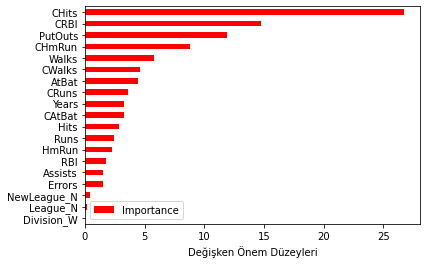

In [58]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

* Bir Cok Kaggle Yarismasinda 1. Lerin Kullandigi Algoritmadir

* gbm Ile Karsilastirildiginda XGBoost Daha Iyi Cikmasini Bekleriz ( Genel Olarak ) ( Ama Belli De Olma Terside Cikabilir )

In [59]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [60]:
#!pip install xgboost

In [61]:
import xgboost as xgb

In [62]:
# Asagidaki Yapilar xgb'nin Ozel Veri Yapisi

# ( Gelistiricileri Soyle Demis : Eger Bu Modeli Kullanicaksaniz Pandas Veya Numpy Arrayleri Yerine xgb'nin Veri Yapisini Kullanin Daha Iyi Demis )


DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [63]:
from xgboost import XGBRegressor

In [64]:
xgb_model = XGBRegressor().fit(X_train, y_train) # Model Kurma Islemi Bu Kadar

## Tahmin

In [65]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [66]:
xgb_model

# Onemli Parametreler


# Agaca Dayali Bir Booster ( booster='gbtree' ) Kullanicaz 
# colsample_bytree=1 ---->> Agac Basina Degiskenlerden Alinacak Olan Ornek Orani Gibi Bir Ifadesi Var Bunun 
# learning_rate=0.300000012 ------>> Onceki Bolumlerde Kullnadigimiz ( Onemli ) Parametrelerden Birisi ---->> Daraltma Adim Boyu Olarak Geciyor Bu Over_Fitting'i Engellemek ----->>
# ---->> Icin Kullandigimiz Degiskenlerden Birisi Bu 0 Ile 1 Arasinda Deger Almasini Bekliyoruz Normalde ( Cok Kucuk Olmasi Tahmin Suresini Arttirip Uzatsada Basarilari Arttirir )
# max_depth=6 ---> Maximum Derinlik --->> Over_Fittig'in Onune Gecmek Icin Kullanabildigimiz Ve Karmasiklik Parametresi Olarak Adlandirabilecegimiz ( Ciddi Etkisi Olan ) Parametre
# n_estimators=100 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [67]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], # Veri Setimiz Buyuk Olmadigindan Dolayi Buradaki Degerlerin Yakin Cikmasini Bekledik
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5] # Burayi Daha Dusuk Biraktik Sureyi Uzatmamasi Adina 
}


In [68]:
"""
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

"""

'\nxgb = XGBRegressor()\n\nxgb_cv = GridSearchCV(xgb, \n                      param_grid = xgb_grid, \n                      cv = 10, \n                      n_jobs = -1,\n                      verbose = 2)\n\n\nxgb_cv.fit(X_train, y_train)\n\n'

In [69]:
"""
xgb_cv.best_params_

"""

# -------------------------

"""

En Iyi Degerler



{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}


"""

"\n\nEn Iyi Degerler\n\n\n\n{'colsample_bytree': 0.6,\n 'learning_rate': 0.1,\n 'max_depth': 2,\n 'n_estimators': 1000}\n\n\n"

In [70]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [71]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.939380238651

Model Kullanirken Neye Dikkat Etmeliyiz

* Kullanicak Oldugumuz Modelin Onemli Parametreleri Belirlenir ( Mesela Yukaridaki Problem Icin En Oneli Parametre ( learning_rate = 0.1 ) Ondan Sonra ( max_depth = 2 ) Oldugunu Dusunelim Bunlar Belirlendikten Sonra
* Parametrelerin On Tanimli Degerleri Sabit Birakilir, Oncelikle En Onemli Olan Parametrenin Degerleri Aranir Ve Bulunduktan Sonra Benzer Islem Bir Sonraki En Onemli Parametre Icin yapilir ( Birini Yaparken Digerlerini Sabitliyoruz, Sadece Bir Tanesine Bakiyoruz )
* Bunlari Birde Carpistirarak Genel Durumu Gozlemleyecek Sekilde Bir Gelismis Hiper_Parametre Optimizasyonu Denenir

# Light GBM

In [72]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [73]:
#!pip install lightgbm

In [74]:
from lightgbm import LGBMRegressor

In [75]:
#conda install -c conda-forge lightgbm ------->> Conda Araciligi Ile Yukleme Islemleri Gerceklestirebiliyoruz ( Bilgilendirme )

In [76]:
# from lightgbm import LGBMRegressor ----->> Burayi Hata Almadan Kurtardik ( Cok Fazla Hata Alinabiliyormus)

In [77]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [78]:
# !! Burada Farklilik Var Dikkat !!

y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_) # Burada Farklilik Var Dikkat

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [80]:
lgbm_model

LGBMRegressor()

In [81]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [82]:
"""
lgbm_cv_model.fit(X_train, y_train) # ( Coook Uzun Surdu ) ( Bu Degerlere Gore Calistirma Bu Fit Islemini )

"""

'\nlgbm_cv_model.fit(X_train, y_train) # ( Coook Uzun Surdu ) ( Bu Degerlere Gore Calistirma Bu Fit Islemini )\n\n'

In [83]:
"""
lgbm_cv_model.best_params_

"""

'\nlgbm_cv_model.best_params_\n\n'

In [84]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [85]:
y_pred = lgbm_tuned.predict(X_test)

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

# CatBoost

In [87]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [88]:
# !pip install catboost

In [89]:
from catboost import CatBoostRegressor

In [90]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train) # Modelimizi Kurduk

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 58ms	remaining: 58s
1:	learn: 431.3923642	total: 60ms	remaining: 29.9s
2:	learn: 424.8820360	total: 61.4ms	remaining: 20.4s
3:	learn: 418.2514904	total: 62.7ms	remaining: 15.6s
4:	learn: 412.6394021	total: 64ms	remaining: 12.7s
5:	learn: 406.6247020	total: 65.3ms	remaining: 10.8s
6:	learn: 400.5321206	total: 66.5ms	remaining: 9.44s
7:	learn: 394.6683437	total: 67.9ms	remaining: 8.42s
8:	learn: 388.2496484	total: 69.2ms	remaining: 7.62s
9:	learn: 382.9448842	total: 70.5ms	remaining: 6.98s
10:	learn: 377.2600080	total: 71.9ms	remaining: 6.46s
11:	learn: 372.4829606	total: 73.3ms	remaining: 6.03s
12:	learn: 366.6823437	total: 74.7ms	remaining: 5.67s
13:	learn: 362.6076230	total: 75.9ms	remaining: 5.35s
14:	learn: 358.0107745	total: 77.3ms	remaining: 5.07s
15:	learn: 353.2802665	total: 78.4ms	remaining: 4.82s
16:	learn: 348.5646265	total: 79.7ms	remaining: 4.61s
17:	learn: 343.6407912	total: 81.1ms	remaining: 4.43s
18:	learn: 339.2

## Tahmin

In [91]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [92]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] } # Isimler Bi Tik Degisiklik Gosterebiliyor Ama Ana Mantik Ayni Tum Modellerde

In [93]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [94]:
"""
catb_cv_model.fit(X_train, y_train)

"""

'\ncatb_cv_model.fit(X_train, y_train)\n\n'

In [95]:
"""
catb_cv_model.best_params_

"""

'\ncatb_cv_model.best_params_\n\n'

In [96]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 442.4903140	total: 6.76ms	remaining: 1.34s
1:	learn: 440.4621805	total: 10.8ms	remaining: 1.06s
2:	learn: 438.5132091	total: 14.4ms	remaining: 946ms
3:	learn: 436.2180377	total: 17.7ms	remaining: 866ms
4:	learn: 434.0461579	total: 21.1ms	remaining: 822ms
5:	learn: 431.8437770	total: 24.4ms	remaining: 788ms
6:	learn: 430.1594587	total: 27.6ms	remaining: 762ms
7:	learn: 428.0941830	total: 31ms	remaining: 745ms
8:	learn: 426.0998774	total: 34.7ms	remaining: 737ms
9:	learn: 424.0249067	total: 35.6ms	remaining: 676ms
10:	learn: 422.1921868	total: 38.9ms	remaining: 669ms
11:	learn: 420.2506764	total: 42.4ms	remaining: 664ms
12:	learn: 418.3116383	total: 46ms	remaining: 662ms
13:	learn: 416.2966847	total: 49.8ms	remaining: 662ms
14:	learn: 414.5776175	total: 53.6ms	remaining: 661ms
15:	learn: 412.8009394	total: 57.4ms	remaining: 660ms
16:	learn: 410.9774146	total: 60.9ms	remaining: 656ms
17:	learn: 409.1047417	total: 64.5ms	remaining: 653ms
18:	learn: 407.6243957	total: 68.2ms	remai

In [97]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

369.6970696250705